In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

def readPd(filename):
    df = pd.read_csv(filename)
    # Read as scientific notation
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

In [6]:
def plotBodeMC(frec, loglog=[], semilog=[]):
    # check if plot_data is a list
    if not isinstance(loglog, list):
        loglog = [loglog]
    if not isinstance(semilog, list):
        semilog = [semilog]

    # Create a figure and two axes
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    cmap =  plt.cm.viridis(np.linspace(0, 1, len(frec)))
    ax1.set_prop_cycle('color', cmap)
    ax2.set_prop_cycle('color', cmap)

    for y1 in loglog:
        ax1.loglog(frec, y1, lw=1.5, linestyle='-', alpha=0.8)
    for y2 in semilog:
        ax2.semilogx(frec, y2, lw=1.5, linestyle='-', alpha=0.5)

    ax1.set_ylabel('LogLog', color='black')
    ax2.set_ylabel('Semilog', color='black')

    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, which="both", ls="-", axis="x")
    ax1.grid(True, which="both", ls="-", axis="y")

    ax2.tick_params(axis='y', labelcolor='black')
    ax2.grid(True, which="major", ls="-")

    ax1.xaxis.set_minor_locator(plt.LogLocator(base=10, subs='all', numticks=400))
    ax1.xaxis.set_major_locator(plt.LogLocator(base=10, numticks=100))

    # set ticks for ax2 y axis
    ax2.yaxis.set_major_locator(plt.MultipleLocator(15))
    # ax1.yaxis.set_major_locator(plt.MultipleLocator(20))

    ax1.set_xlabel('Frecuencia $[Hz]$')

    # set axis limits
    ax1.set_xlim(left=min(frec), right=max(frec))
    plt.show()

In [4]:

df = readPd('L_HP.csv')
# reinterpret as float
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Frecuencia  16 non-null     float64
 1   L[mH]       16 non-null     float64
 2   Q           16 non-null     float64
 3   Rs[Ohm]     16 non-null     float64
 4   |Z|         16 non-null     float64
 5   Fase        16 non-null     float64
dtypes: float64(6)
memory usage: 896.0 bytes


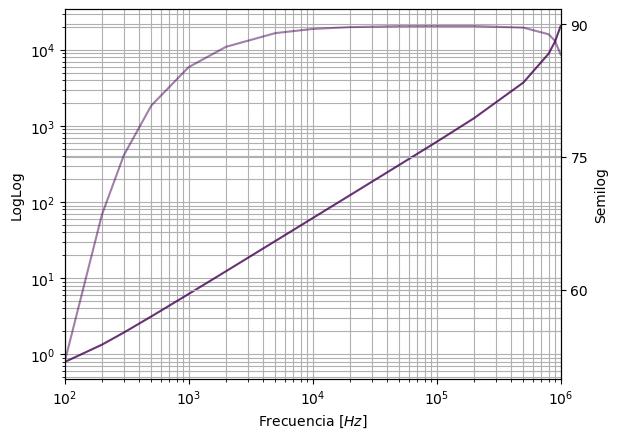

In [9]:
plotBodeMC(df['Frecuencia'], loglog=df['|Z|'], semilog=df['Fase'])